In [1]:
#Thompson Sampling
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the dataset
dataset = pd.read_csv('gdrive/My Drive/Data/Ads_CTR_Optimisation.csv')

In [0]:
#Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

In [17]:
print(total_reward)

2606


In [18]:
print(ads_selected)

[3, 1, 5, 4, 2, 8, 7, 1, 0, 7, 9, 6, 3, 3, 5, 1, 9, 7, 8, 1, 0, 8, 3, 0, 3, 9, 3, 2, 0, 6, 1, 2, 1, 2, 9, 0, 1, 4, 6, 2, 5, 4, 1, 1, 5, 0, 4, 6, 2, 6, 4, 5, 4, 4, 3, 4, 4, 8, 4, 4, 6, 3, 6, 1, 6, 7, 6, 4, 9, 5, 7, 7, 7, 9, 4, 7, 1, 4, 8, 4, 5, 2, 7, 4, 3, 9, 7, 3, 7, 0, 4, 4, 8, 4, 7, 4, 4, 4, 3, 7, 3, 3, 2, 2, 3, 7, 7, 3, 7, 3, 2, 4, 4, 4, 1, 2, 3, 3, 4, 8, 4, 8, 7, 4, 8, 4, 8, 4, 7, 7, 7, 1, 1, 2, 7, 1, 1, 7, 7, 7, 3, 3, 0, 4, 6, 2, 4, 0, 9, 1, 7, 7, 2, 2, 7, 1, 5, 8, 1, 1, 8, 7, 0, 4, 2, 8, 4, 7, 3, 8, 9, 6, 1, 5, 1, 9, 8, 4, 2, 4, 4, 2, 4, 7, 1, 1, 7, 2, 1, 2, 1, 1, 8, 8, 9, 4, 8, 1, 4, 3, 5, 5, 4, 2, 4, 4, 7, 7, 3, 9, 4, 3, 3, 7, 4, 7, 7, 7, 1, 1, 4, 7, 5, 2, 4, 8, 1, 3, 2, 3, 3, 8, 3, 3, 1, 7, 1, 7, 9, 7, 7, 3, 1, 3, 9, 7, 7, 7, 4, 8, 7, 3, 4, 7, 7, 4, 3, 3, 7, 8, 1, 8, 9, 7, 3, 9, 1, 6, 4, 3, 2, 6, 2, 3, 3, 7, 1, 7, 4, 3, 3, 8, 1, 7, 7, 3, 6, 7, 4, 3, 7, 7, 7, 7, 3, 7, 4, 9, 3, 2, 3, 7, 0, 3, 3, 1, 4, 3, 7, 3, 9, 7, 7, 7, 7, 3, 2, 5, 7, 4, 7, 4, 4, 0, 4, 7, 1, 7, 3, 3, 1, 6, 6, 

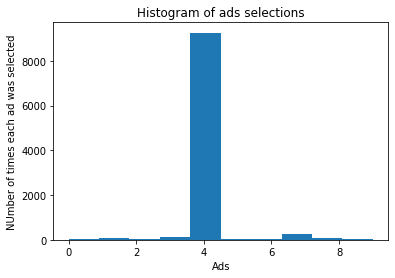

In [19]:
#Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('NUmber of times each ad was selected')
plt.show()